# K-Means Clustering

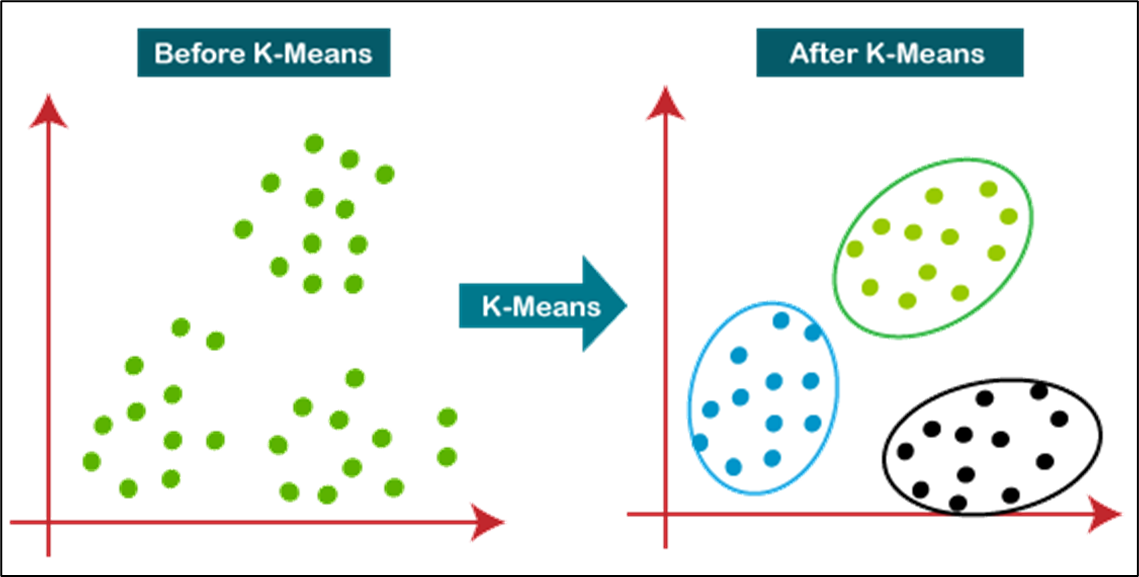

### Install the yellowbricks package

In [1]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the dataset

In [3]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Problem Statement : Classify Similar customers based on Income and Spending

### Step 2: Perform basic data quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

In [6]:
df.duplicated().sum()

0

### Step 3: Seperate X from dataframe

In [7]:
X = df[['Income', 'Spending']]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


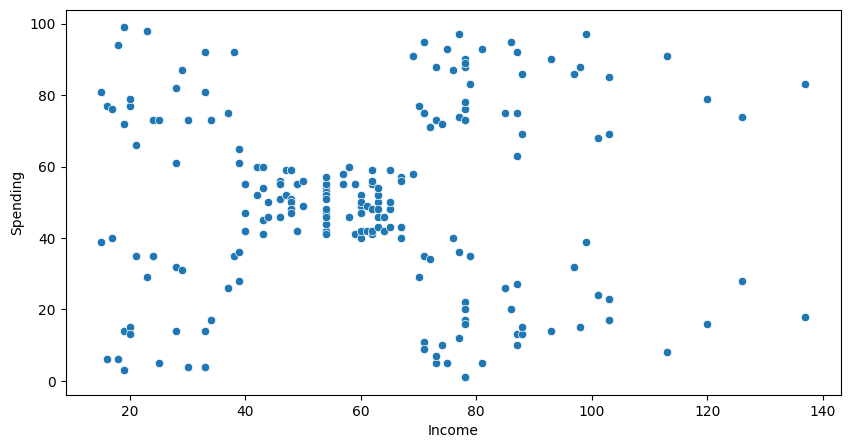

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(data=X, x='Income', y='Spending')
plt.show()

### Preprocess the X data

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [18]:
X_pre = num_pipe.fit_transform(X)
X_pre

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


### Finding optimal number of clusters with yellowbricks

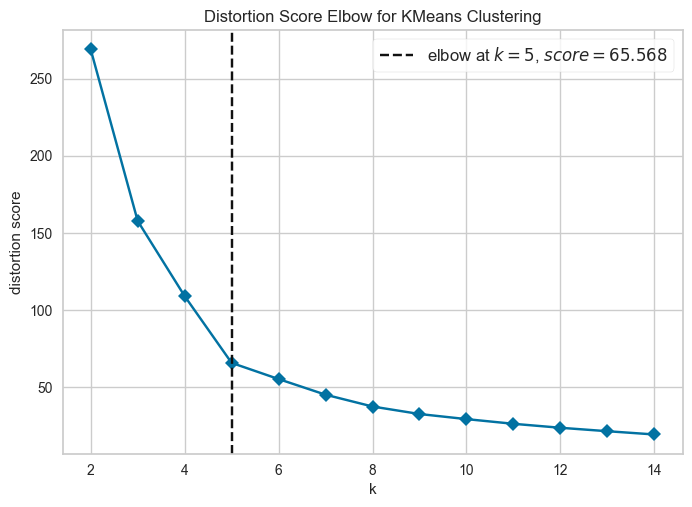

In [19]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 15), timings=False)
visualizer.fit(X_pre)
visualizer.show()
plt.show()

### From above visualizer elbow is found at k=5 

### Create K-Means algorithm with number of clusters = 5

In [20]:
best_kmeans = KMeans(n_clusters=5)
clusters = best_kmeans.fit_predict(X_pre)
clusters

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1,
       2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

### Save above results in X

In [21]:
X['Cluster'] = clusters 

In [22]:
X

,Income,Spending,Cluster
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
...,...,...,...
195,120,79,0
196,126,28,3
197,126,74,0
198,137,18,3


In [23]:
X[X['Cluster']==0]

,Income,Spending,Cluster
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0
133,72,71,0
135,73,88,0
137,73,73,0
139,74,72,0
141,75,93,0


In [24]:
X[X['Cluster']==1]

,Income,Spending,Cluster
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1


In [25]:
for i in range(5):
    print(f'Cluster Number : {i}')
    display(X[X['Cluster']==i])
    print('\n============================================\n')

Cluster Number : 0


,Income,Spending,Cluster
123,69,91,0
125,70,77,0
127,71,95,0
129,71,75,0
131,71,75,0
133,72,71,0
135,73,88,0
137,73,73,0
139,74,72,0
141,75,93,0




Cluster Number : 1


,Income,Spending,Cluster
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1




Cluster Number : 2


,Income,Spending,Cluster
0,15,39,2
2,16,6,2
4,17,40,2
6,18,6,2
8,19,3,2
10,19,14,2
12,20,15,2
14,20,13,2
16,21,35,2
18,23,29,2




Cluster Number : 3


,Income,Spending,Cluster
124,70,29,3
128,71,11,3
130,71,9,3
134,73,5,3
136,73,7,3
138,74,10,3
140,75,5,3
144,77,12,3
146,77,36,3
148,78,22,3




Cluster Number : 4


,Income,Spending,Cluster
1,15,81,4
3,16,77,4
5,17,76,4
7,18,94,4
9,19,72,4
11,19,99,4
13,20,77,4
15,20,79,4
17,21,66,4
19,23,98,4


In [27]:
centroids = X.groupby(by='Cluster').mean()
centroids

,Income,Spending
Cluster,,
0,86.538462,82.128205
1,55.296296,49.518519
2,26.304348,20.913043
3,88.200000,17.114286
4,25.727273,79.363636


### Visulaizing Clusters with centroids

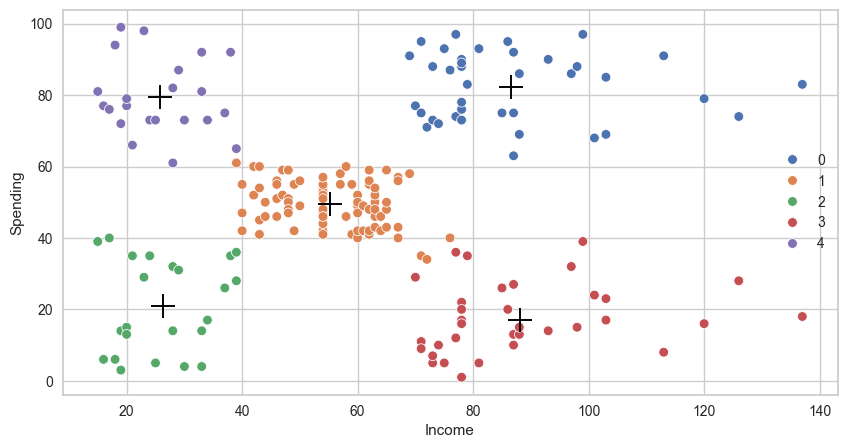

In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=X, x='Income', y='Spending', hue='Cluster', palette='deep')
sns.scatterplot(data=centroids, x='Income', y='Spending', color='black', marker='+', s=300)
plt.show()